 14. In this problem, you will develop a model to predict whether a given
 car gets high or low gas mileage based on the Auto data set.

(a) Create a binary variable, mpg01, that contains a 1 if mpg contains
 a value above its median, and a 0 if mpg contains a value below
 its median. You can compute the median using the median()
 method of the data frame. Note you may find it helpful to add
 a column mpg01 to the data frame by assignment. Assuming you
 have stored the data frame as Auto, this can be done as follows:

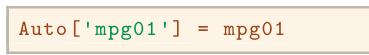

In [1]:
import pandas as pd

# Load the Auto dataset
Auto = pd.read_csv("Auto.csv")  # Replace with actual path to your dataset

# Calculate the median of the 'mpg' column
mpg_median = Auto['mpg'].median()

# Create the binary 'mpg01' variable
Auto['mpg01'] = (Auto['mpg'] > mpg_median).astype(int)


c:\Users\sabri\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


 (b) Explore the data graphically in order to investigate the associ
ation between mpg01 and the other features. Which of the other
 features seem most likely to be useful in predicting mpg01? Scat
terplots and boxplots may be useful tools to answer this ques
tion. Describe your findings.

C:\Users\sabri\AppData\Local\Temp\ipykernel_30900\4061750939.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[i, 1], x='mpg01', y=feature, data=Auto, palette='Set2')
C:\Users\sabri\AppData\Local\Temp\ipykernel_30900\4061750939.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[i, 1], x='mpg01', y=feature, data=Auto, palette='Set2')
C:\Users\sabri\AppData\Local\Temp\ipykernel_30900\4061750939.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[i, 1], x='mpg01', y=feature, data=Auto, palette='Set2')
C:\Users\sabr

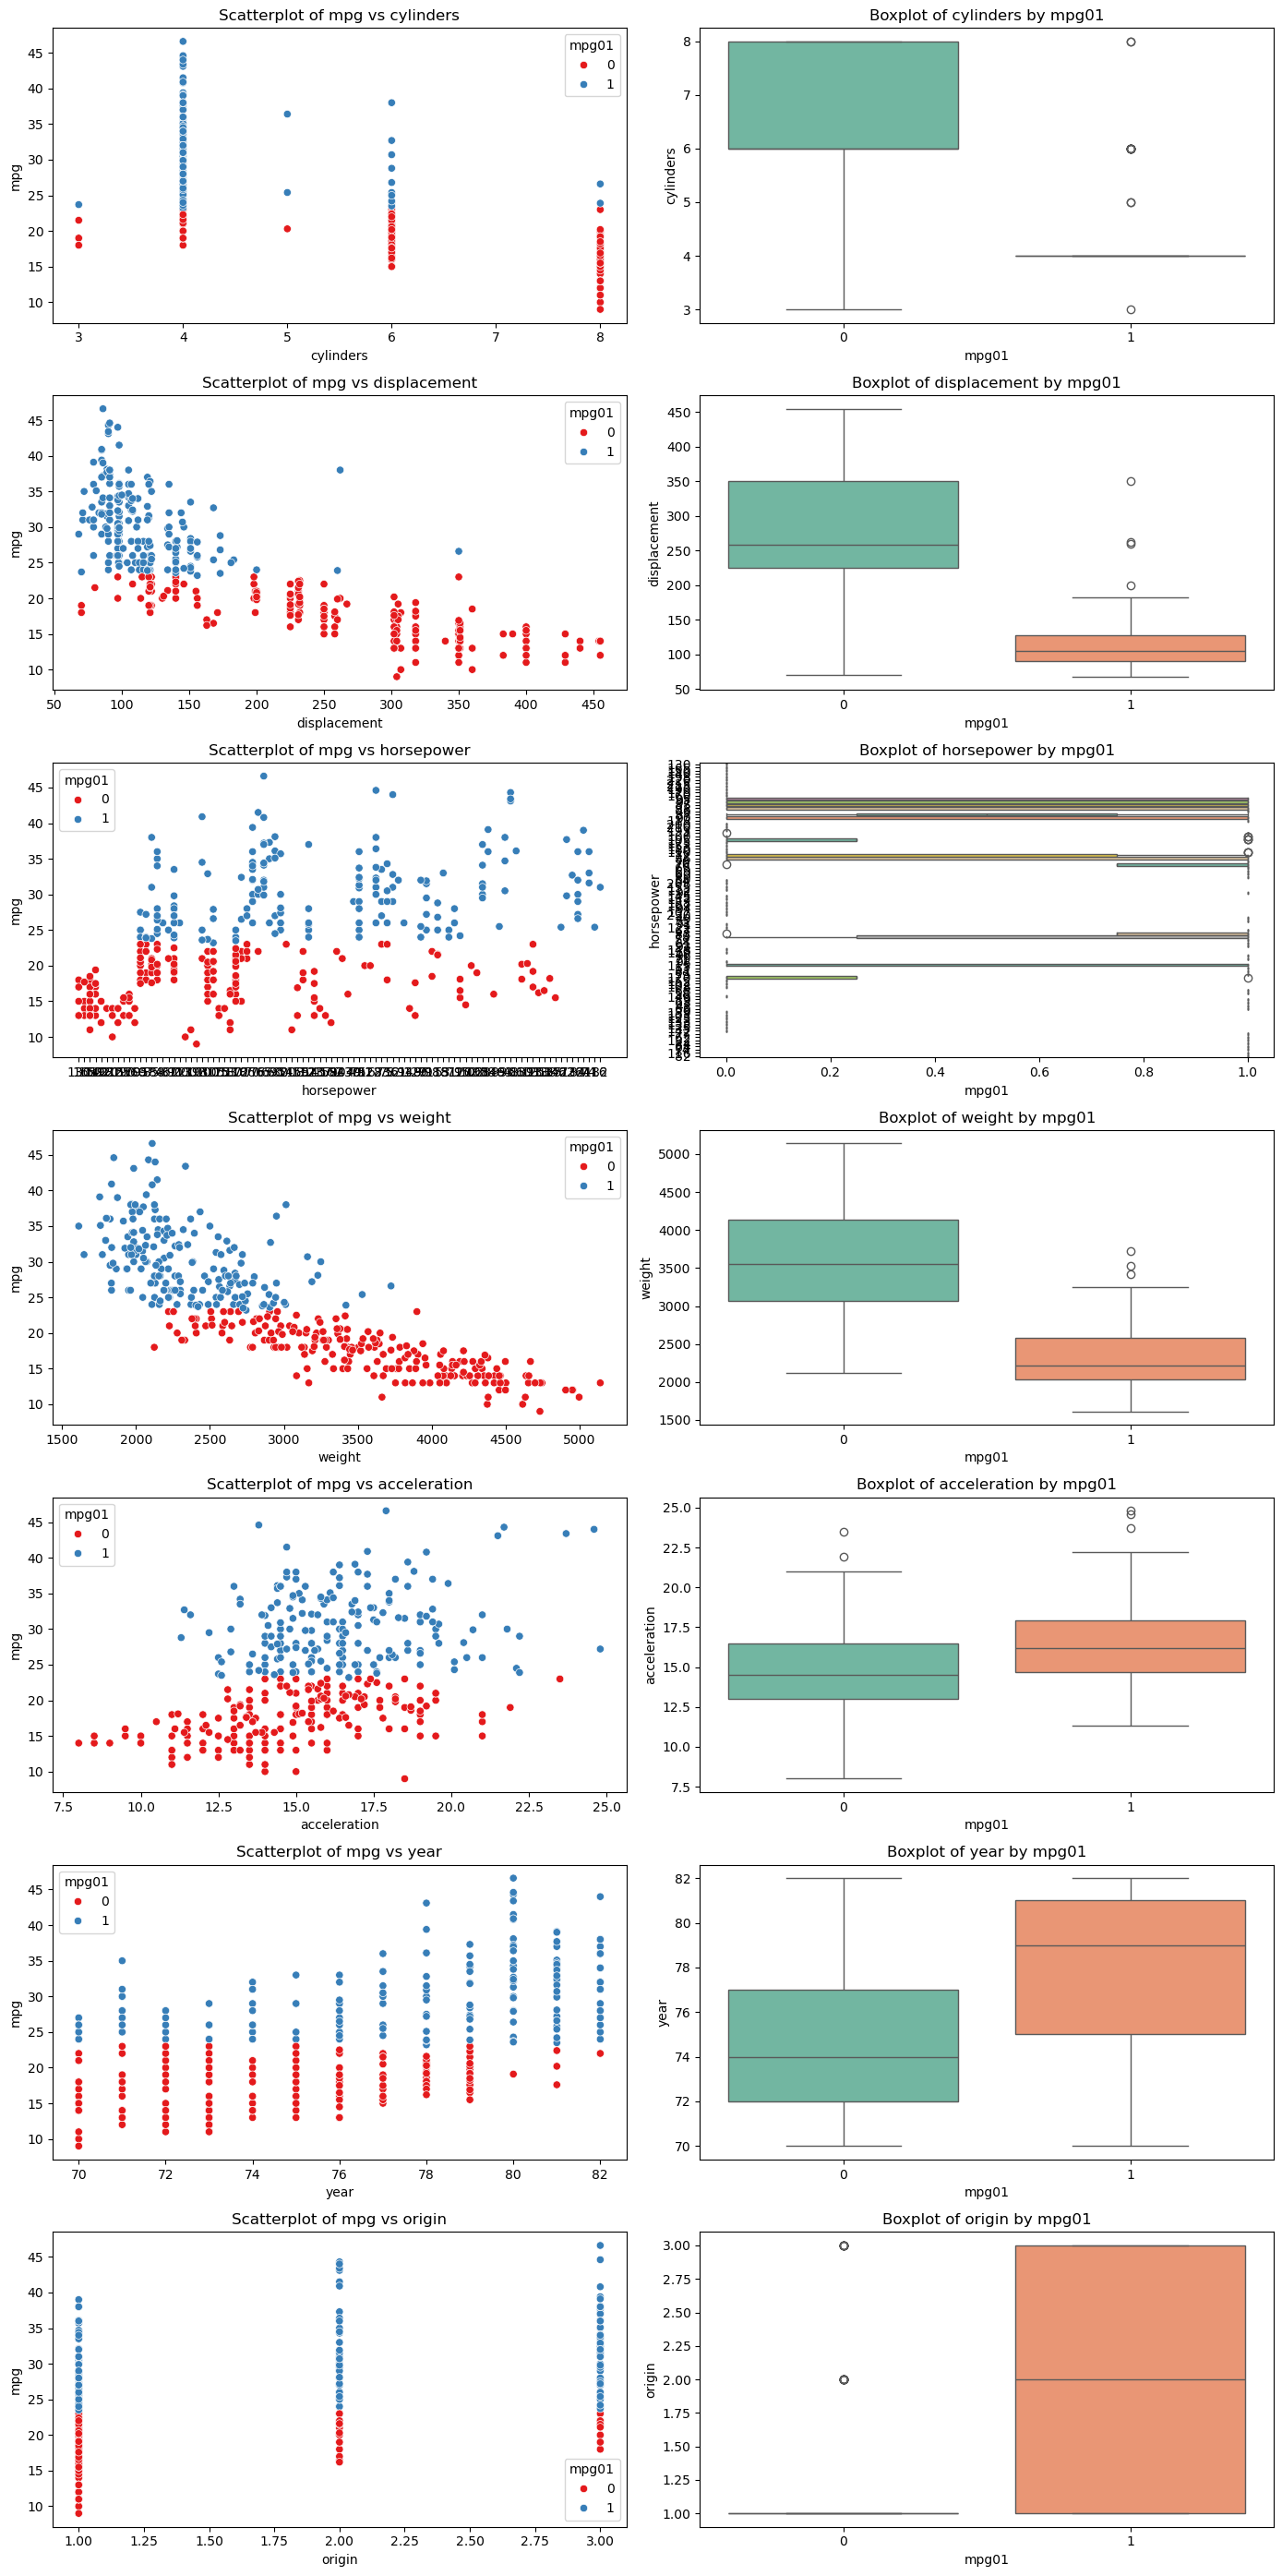

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns


# Define the features to analyze
features = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']

# Set up the plotting area with subplots
fig, axes = plt.subplots(len(features), 2, figsize=(14, len(features) * 4))

for i, feature in enumerate(features):
    # Scatterplot for each feature vs mpg with mpg01 as hue
    sns.scatterplot(ax=axes[i, 0], x=feature, y='mpg', data=Auto, hue='mpg01', palette='Set1')
    axes[i, 0].set_title(f'Scatterplot of mpg vs {feature}')
    
    # Boxplot for each feature grouped by mpg01
    sns.boxplot(ax=axes[i, 1], x='mpg01', y=feature, data=Auto, palette='Set2')
    axes[i, 1].set_title(f'Boxplot of {feature} by mpg01')

# Adjust layout for readability
plt.tight_layout()
plt.show()


Findings：
- Lower mileage in cars with more cylinders
- Weight is likely a useful predictor for gas mileage
- Cars with higher acceleration tend to have higher mpg
- Cars from later years (around 76 and above) tend to have higher gas mileage

Features such as cylinders, displacement, horsepower, weight, and year show the most clear and significant differences between high and low gas mileage (mpg01), making them likely to be useful predictors for a model that predicts whether a car has high or low gas mileage.

 (c) Split the data into a training set and a test set

In [4]:
from sklearn.model_selection import train_test_split

# Define the features (excluding 'mpg' and 'mpg01' if 'mpg01' is the target variable)
X = Auto[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']]
y = Auto['mpg01']  # Target variable

# Split the data into training and test sets (e.g., 70% training, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the shapes of the split data
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)


Training set size: (277, 7)
Test set size: (120, 7)


 (d) Perform LDA on the training data in order to predict mpg01
 using the variables that seemed most associated with mpg01 in
 (b). What is the test error of the model obtained?


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

# Replace '?' with NaN and drop rows with NaN in the selected columns
Auto = Auto.replace('?', pd.NA)
Auto.dropna(subset=['cylinders', 'displacement', 'horsepower', 'weight', 'year'], inplace=True)

# Convert columns to numeric to ensure compatibility with LDA
Auto[['cylinders', 'displacement', 'horsepower', 'weight', 'year']] = Auto[
    ['cylinders', 'displacement', 'horsepower', 'weight', 'year']
].apply(pd.to_numeric)

# Redefine features and target after cleaning
X = Auto[['cylinders', 'displacement', 'horsepower', 'weight', 'year']]
y = Auto['mpg01']

# Split the data into training and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Perform LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Predict on the test set
y_pred = lda.predict(X_test)

# Calculate the test error (1 - accuracy)
test_error = 1 - accuracy_score(y_test, y_pred)
test_error



0.13559322033898302

 (e) Perform QDA on the training data in order to predict mpg01
 using the variables that seemed most associated with mpg01 in
 (b). What is the test error of the model obtained?

In [7]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Perform Quadratic Discriminant Analysis (QDA)
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

# Predict on the test set
y_pred_qda = qda.predict(X_test)

# Calculate the test error (1 - accuracy) for QDA
test_error_qda = 1 - accuracy_score(y_test, y_pred_qda)
test_error_qda


0.11864406779661019

 (f) Perform logistic regression on the training data in order to pre
dict mpg01 using the variables that seemed most associated with
 mpg01 in (b). What is the test error of the model obtained?

In [8]:
from sklearn.linear_model import LogisticRegression

# Perform Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_log_reg = log_reg.predict(X_test)

# Calculate the test error (1 - accuracy) for Logistic Regression
test_error_log_reg = 1 - accuracy_score(y_test, y_pred_log_reg)
test_error_log_reg


c:\Users\sabri\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.11016949152542377

 (g) Perform naive Bayes on the training data in order to predict
 mpg01 using the variables that seemed most associated with mpg01
 in (b). What is the test error of the model obtained?

In [9]:
from sklearn.naive_bayes import GaussianNB

# Perform Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predict on the test set
y_pred_nb = nb.predict(X_test)

# Calculate the test error (1 - accuracy) for Naive Bayes
test_error_nb = 1 - accuracy_score(y_test, y_pred_nb)
test_error_nb


0.14406779661016944

 (h) Perform KNN on the training data, with several values of K, in
 order to predict mpg01. Use only the variables that seemed most
 associated with mpg01 in (b). What test errors do you obtain?
 Which value of K seems to perform the best on this data set?

In [10]:
from sklearn.neighbors import KNeighborsClassifier

# Define a range of K values to test
k_values = range(1, 21)
test_errors_knn = {}

# Loop through different K values and record test errors
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test)
    test_error_knn = 1 - accuracy_score(y_test, y_pred_knn)
    test_errors_knn[k] = test_error_knn

# Display the test errors for each K
test_errors_knn


{1: 0.1694915254237288,
 2: 0.1610169491525424,
 3: 0.14406779661016944,
 4: 0.1610169491525424,
 5: 0.17796610169491522,
 6: 0.17796610169491522,
 7: 0.1694915254237288,
 8: 0.1694915254237288,
 9: 0.1694915254237288,
 10: 0.17796610169491522,
 11: 0.1694915254237288,
 12: 0.15254237288135597,
 13: 0.17796610169491522,
 14: 0.1694915254237288,
 15: 0.17796610169491522,
 16: 0.17796610169491522,
 17: 0.17796610169491522,
 18: 0.17796610169491522,
 19: 0.17796610169491522,
 20: 0.15254237288135597}

K=3 seems to perform the best for predicting mpg01 on this dataset among the values tested.